# Streaming Data with Python Generators

In [1]:
import numpy as np
import pandas as pd
import csv

# Understanding Python Generators
## Example 1

In [2]:
def my_generator(my_array):
    i = 0
    while True:
        yield my_array[i:i+2,:]# output two elements at a time
        i += 1

test_array = np.array([[10.0, 2.0],
                       [15, 6.0],
                       [3.2, -1.5],
                       [-3, -2]], np.float32)

output = my_generator(test_array)
print("1rst")
print(next(output))
print("2nd")
print(next(output))
print("3th")
print(next(output))
print("4th")
print(next(output))
print("last: pass the avaialble index in test array")
print(next(output))


1rst
[[10.  2.]
 [15.  6.]]
2nd
[[15.   6. ]
 [ 3.2 -1.5]]
3th
[[ 3.2 -1.5]
 [-3.  -2. ]]
4th
[[-3. -2.]]
last: pass the avaialble index in test array
[]


## Example 2

In [3]:
# Iterables
mylist = [1,2,3]
for i in mylist:
    print(i)

1
2
3


In [4]:
# A list comprehensions
mylist = [x*x for x in range(3)]
for i in mylist:
    print(i)

0
1
4


In [5]:
#Generators
mygenerator =(x*x for x in range(3))
for i in mygenerator:
    print(i)

0
1
4


In [6]:
#Use of Yield
def create_generator():
    mylist = range(3)
    for i in mylist:
        yield i*i
mygenerator = create_generator()
print(mygenerator) # is an object
for i in mygenerator:
    print(i)

<generator object create_generator at 0x124fd6b30>
0
1
4


# Streaming File Content with a Generator

In [7]:
file_path = '../datasets/kaggle/'
file_name = "pima-indians-diabetes.data.csv"
col_name = ['Pregnancies', 'Glucose', 'BloodPressure',
            'SkinThickness', 'Insulin', 'BMI',
            'DiabetesPedigree', 'Age', 'Outcome']

pd.read_csv(file_path+file_name, names=col_name)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
...,...,...,...,...,...,...,...,...,...
764,10,101,76,48,180,32.9,0.171,63,0
765,2,122,70,27,0,36.8,0.34,27,0
766,5,121,72,23,112,26.2,0.245,30,0
767,1,126,60,0,0,30.1,0.349,47,1


Since we want to stream this dataset, it is more convenient to read it as a CSV file and use the generator to output the rows, just like we did with the NumPy array in the preceding section. The way to do this is through the following code:

In [8]:
with open(file_path + file_name, newline='\n') as cvsfile:
    f = csv.reader(cvsfile, delimiter=',')
    for row in f:
        print(','.join(row))

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0
3,78,50,32,88,31,0.248,26,1
10,115,0,0,0,35.3,0.134,29,0
2,197,70,45,543,30.5,0.158,53,1
8,125,96,0,0,0,0.232,54,1
4,110,92,0,0,37.6,0.191,30,0
10,168,74,0,0,38,0.537,34,1
10,139,80,0,0,27.1,1.441,57,0
1,189,60,23,846,30.1,0.398,59,1
5,166,72,19,175,25.8,0.587,51,1
7,100,0,0,0,30,0.484,32,1
0,118,84,47,230,45.8,0.551,31,1
7,107,74,0,0,29.6,0.254,31,1
1,103,30,38,83,43.3,0.183,33,0
1,115,70,30,96,34.6,0.529,32,1
3,126,88,41,235,39.3,0.704,27,0
8,99,84,0,0,35.4,0.388,50,0
7,196,90,0,0,39.8,0.451,41,1
9,119,80,35,0,29,0.263,29,1
11,143,94,33,146,36.6,0.254,51,1
10,125,70,26,115,31.1,0.205,41,1
7,147,76,0,0,39.4,0.257,43,1
1,97,66,15,140,23.2,0.487,22,0
13,145,82,19,110,22.2,0.245,57,0
5,117,92,0,0,34.1,0.337,38,0
5,10

## At this point we have load the dataset into the python runtime, lets use yield in a function, making a generator to stream the content of the file (not loading it into python runtime)

In [9]:
def stream_file(file_handle):
    holder = []
    for row in file_handle:
        holder.append(row.rstrip("\n"))
        yield holder
        holder = []

with open(file_path+file_name, newline='\n') as handle:
    for part in stream_file(handle):
        print(part)

['Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome\r']
['6,148,72,35,0,33.6,0.627,50,1\r']
['1,85,66,29,0,26.6,0.351,31,0\r']
['8,183,64,0,0,23.3,0.672,32,1\r']
['1,89,66,23,94,28.1,0.167,21,0\r']
['0,137,40,35,168,43.1,2.288,33,1\r']
['5,116,74,0,0,25.6,0.201,30,0\r']
['3,78,50,32,88,31,0.248,26,1\r']
['10,115,0,0,0,35.3,0.134,29,0\r']
['2,197,70,45,543,30.5,0.158,53,1\r']
['8,125,96,0,0,0,0.232,54,1\r']
['4,110,92,0,0,37.6,0.191,30,0\r']
['10,168,74,0,0,38,0.537,34,1\r']
['10,139,80,0,0,27.1,1.441,57,0\r']
['1,189,60,23,846,30.1,0.398,59,1\r']
['5,166,72,19,175,25.8,0.587,51,1\r']
['7,100,0,0,0,30,0.484,32,1\r']
['0,118,84,47,230,45.8,0.551,31,1\r']
['7,107,74,0,0,29.6,0.254,31,1\r']
['1,103,30,38,83,43.3,0.183,33,0\r']
['1,115,70,30,96,34.6,0.529,32,1\r']
['3,126,88,41,235,39.3,0.704,27,0\r']
['8,99,84,0,0,35.4,0.388,50,0\r']
['7,196,90,0,0,39.8,0.451,41,1\r']
['9,119,80,35,0,29,0.263,29,1\r']
['11,143,94,33,146,36.6,0.254,51,1\r']
['1

# Creating a file patter object using tf.io

In [10]:
import tensorflow as tf
base_pattern = '../datasets/covid'
file_pattern = 'owid-covid-data-part*'
files = tf.io.gfile.glob(base_pattern + '/' + file_pattern)
print(files)

['../datasets/covid/owid-covid-data-part00352.csv', '../datasets/covid/owid-covid-data-part00346.csv', '../datasets/covid/owid-covid-data-part00391.csv', '../datasets/covid/owid-covid-data-part00385.csv', '../datasets/covid/owid-covid-data-part00150.csv', '../datasets/covid/owid-covid-data-part00144.csv', '../datasets/covid/owid-covid-data-part0091.csv', '../datasets/covid/owid-covid-data-part0085.csv', '../datasets/covid/owid-covid-data-part00178.csv', '../datasets/covid/owid-covid-data-part00193.csv', '../datasets/covid/owid-covid-data-part00187.csv', '../datasets/covid/owid-covid-data-part0052.csv', '../datasets/covid/owid-covid-data-part0046.csv', '../datasets/covid/owid-covid-data-part00226.csv', '../datasets/covid/owid-covid-data-part00232.csv', '../datasets/covid/owid-covid-data-part00233.csv', '../datasets/covid/owid-covid-data-part00227.csv', '../datasets/covid/owid-covid-data-part0047.csv', '../datasets/covid/owid-covid-data-part0053.csv', '../datasets/covid/owid-covid-data-p

# Creating a Streaming Dataset Object

In [11]:
csv_dataset = tf.data.experimental.make_csv_dataset(files,
                                                   header=True,
                                                   batch_size=5,
                                                   label_name='new_deaths',
                                                   num_epochs=1,
                                                   ignore_errors=True)


Metal device set to: Apple M1


2021-11-10 17:08:46.777684: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-11-10 17:08:46.777761: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [12]:
for features, target in csv_dataset.take(1):
    print(f'Target:{target}')
    print('features:')
    for k,v in features.items():
        print(" {!r:20s}:{}".format(k,v))

2021-11-10 17:08:46.962009: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-11-10 17:08:46.962762: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Target:[ 0. 19.  0.  2.  0.]
features:
 'iso_code'          :[b'VNM' b'EGY' b'TWN' b'SYR' b'BLZ']
 'continent'         :[b'Asia' b'Africa' b'Asia' b'Asia' b'North America']
 'location'          :[b'Vietnam' b'Egypt' b'Taiwan' b'Syria' b'Belize']
 'date'              :[b'2020-09-21' b'2020-08-21' b'2020-05-19' b'2021-08-15' b'2021-02-20']
 'total_cases'       :[ 1068. 97148.   440. 26342. 12244.]
 'new_cases'         :[  0. 123.   0.  50.  17.]
 'new_cases_smoothed':[  0.714 132.571   0.     35.     14.143]
 'total_deaths'      :[  35. 5231.    7. 1937.  314.]
 'new_deaths_smoothed':[ 0.    15.286  0.     2.429  0.143]
 'total_cases_per_million':[1.0879000e+01 9.3180103e+02 1.8445000e+01 1.4413669e+03 3.0238445e+04]
 'new_cases_per_million':[ 0.     1.18   0.     2.736 41.984]
 'new_cases_smoothed_per_million':[7.0000e-03 1.2720e+00 0.0000e+00 1.9150e+00 3.4928e+01]
 'total_deaths_per_million':[3.57000e-01 5.01730e+01 2.93000e-01 1.05988e+02 7.75471e+02]
 'new_deaths_per_million':[0.   

# Streaming a CSV Dataset

In [13]:
features, label = next(iter(csv_dataset))
label

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([  0.,   4.,   0.,  26., 303.], dtype=float32)>

In [14]:
features, label = next(iter(csv_dataset))
label

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([   8.,    0., 3118.,   27.,    0.], dtype=float32)>

# Tensorflow image generator

In [15]:
data_dir = tf.keras.utils.get_file('flower_photos','https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz', untar=True)
data_dir

'/Users/ness/.keras/datasets/flower_photos'

In [16]:
datagen_kwargs = dict(rescale=1./255, 
                      validation_split=0.20)

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)

In [17]:
IMAGE_SIZE = (224, 224) # Image height and width
BATCH_SIZE = 32
dataflow_kwargs = dict(target_size=IMAGE_SIZE,
                      batch_size=BATCH_SIZE,
                      interpolation="bilinear")

train_generator = train_datagen.flow_from_directory(
    data_dir, 
    subset="training",
    shuffle=True,
    **dataflow_kwargs)

Found 2939 images belonging to 5 classes.


In [18]:
labels_idx = (train_generator.class_indices)
labels_idx

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [19]:
idx_labels = dict((v,k) for k,v in labels_idx.items())
idx_labels

{0: 'daisy', 1: 'dandelion', 2: 'roses', 3: 'sunflowers', 4: 'tulips'}

In [20]:
for image_batch, labels_batch in train_generator:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 224, 224, 3)
(32, 5)


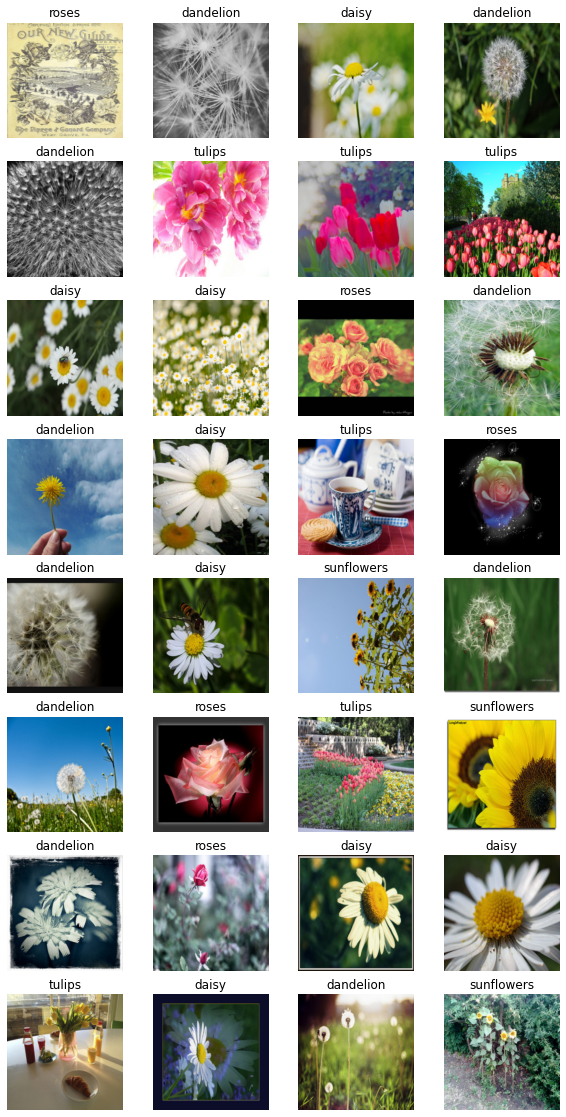

In [26]:
import numpy as np
import matplotlib.pyplot as plt

image_batch, label_batch = next(iter(train_generator))

fig, axes = plt.subplots(8,4, figsize=(10,20))
axes = axes.flatten()
for img, lbl, ax in zip(image_batch, label_batch, axes):
    
    ax.imshow(img)
    label_ = np.argmax(lbl)
    label = idx_labels[label_]
    ax.set_title(label)
    ax.axis('off')
plt.show()